In [1]:

import numpy as np
from numpy.linalg import inv
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import math
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from itertools import combinations
import statistics
sns.set_style("dark")
ORDER = 'F'
N = 240
NSRCS = 6
V = 441
x1 = x2 = 21
DPI = 200
plt.rc("savefig", dpi=DPI)


In [2]:
def generate_tc_vector(arrival, increment, duration):
    vector = np.zeros(arrival)
    sub_vector = np.append(np.ones(duration), np.zeros(increment - duration))
    while len(vector) < N:
        vector = np.append(vector, sub_vector)
    return np.array([vector[:240]])



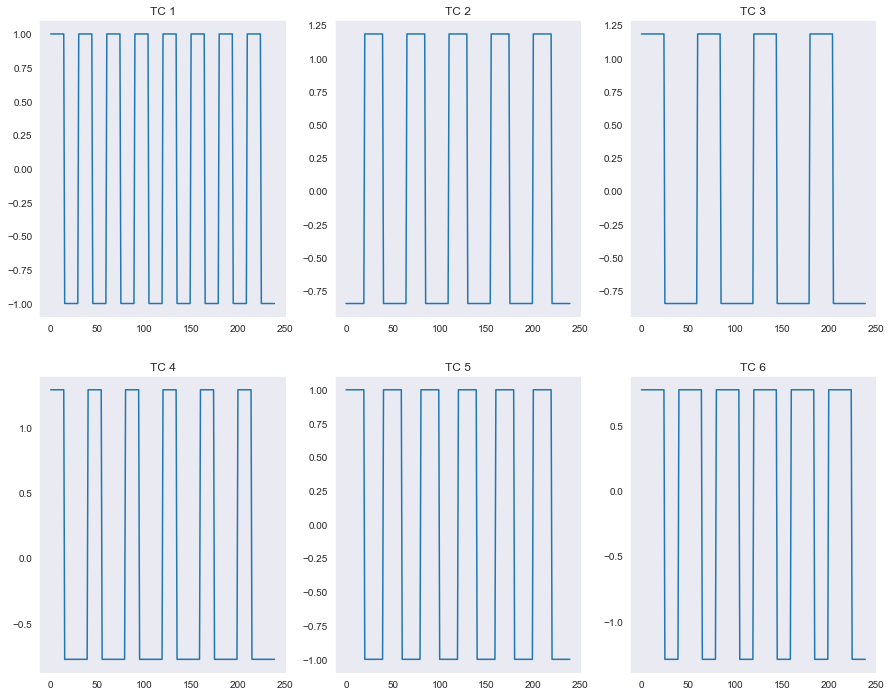

In [3]:
AV = [0, 20, 0, 0, 0, 0]
IV = [30, 45, 60, 40, 40, 40]
DI = [15,20,25,15,20,25]
fig, axs = plt.subplots(2, 3, figsize=(15,12))

for i in range(NSRCS):
    tc_column = preprocessing.scale(generate_tc_vector(AV[i], IV[i], DI[i]).T)
    axs[i//3, i%3].plot(tc_column)
    title = f'TC {i+1}'
    axs[i//3, i%3].title.set_text(title)
    if i == 0:
        TC = tc_column
    else:
        TC = np.append(TC, tc_column, axis=1)

plt.savefig('figures/q1_1.png')

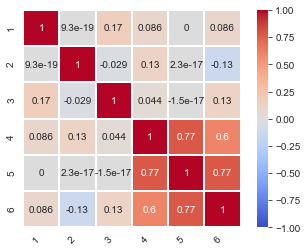

In [4]:
TC_df = pd.DataFrame(data = TC, columns=list(range(1, 7)), index=list(range(1,241)))

corr = TC_df.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    linewidth=0.3,
    cmap='coolwarm',
    annot=True,
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)
plt.savefig('figures/q1_2.png')


In [5]:
test = np.array(([1,2],[3,4],[5,6]))
print(test)
print(np.reshape(test,(1,6),order='F'))


[[1 2]
 [3 4]
 [5 6]]
[[1 3 5 2 4 6]]


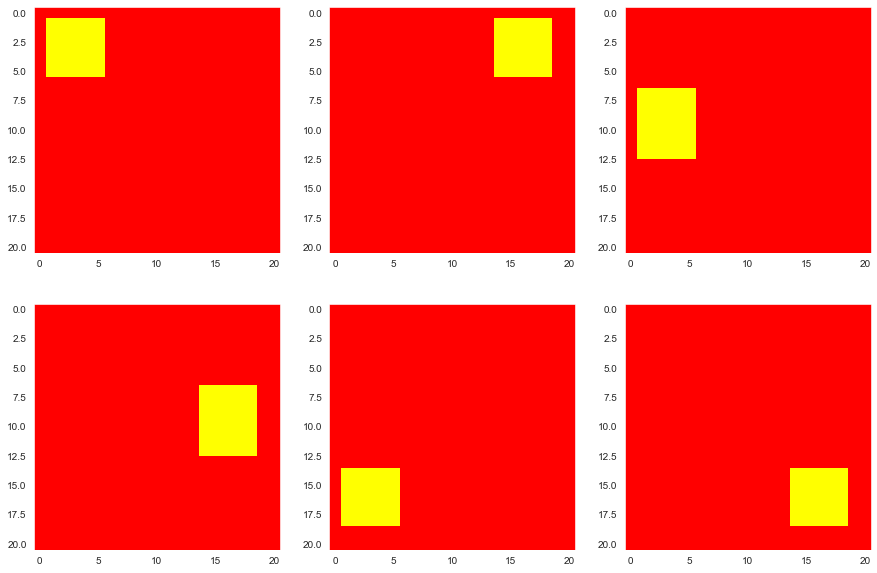

In [6]:
tmpSM1 = np.zeros((21, 21))
tmpSM1[1:6,1:6] = np.ones((5,5))

tmpSM2 = np.zeros((21, 21))
tmpSM2[1:6,14:19] = np.ones((5,5))

tmpSM3 = np.zeros((21, 21))
tmpSM3[7:13,1:6] = np.ones((6,5))

tmpSM4 = np.zeros((21, 21))
tmpSM4[7:13,14:19] = np.ones((6,5))

tmpSM5 = np.zeros((21, 21))
tmpSM5[14:19,1:6] = np.ones((5,5))

tmpSM6 = np.zeros((21, 21))
tmpSM6[14:19,14:19] = np.ones((5,5))

fig, axs = plt.subplots(2, 3, figsize=(15,10))
SMs = [tmpSM1, tmpSM2, tmpSM3, tmpSM4, tmpSM5, tmpSM6]
for i in range(NSRCS):   
    axs[i//3, i%3].imshow(SMs[i],cmap='autumn')
    row = np.reshape(SMs[i], (1, 441), order=ORDER)
    if i == 0:
        SM = row
    else:
        SM = np.append(SM,row,axis= 0)


plt.savefig('figures/q1_3.png')

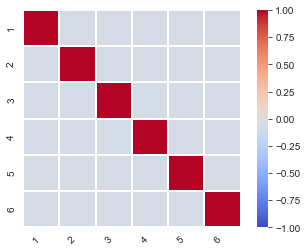

In [7]:
SM_df = pd.DataFrame(data = SM.T, columns=list(range(1, 7)), index=list(range(1,442)))

corr = SM_df.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    linewidth=0.3,
    cmap='coolwarm',
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)
plt.savefig('figures/q1_3_heat.png')

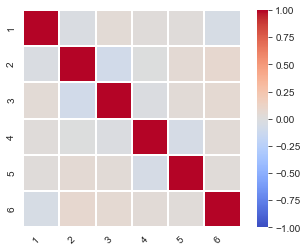

In [8]:
np.random.seed(0)
tau_t = np.random.normal(0, math.sqrt(0.25), size=(240, 6))

tau_t_df = pd.DataFrame(data = tau_t, columns=list(range(1, 7)), index=list(range(1,241)))

corr = tau_t_df.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    linewidth=0.3,
    cmap='coolwarm',
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)
plt.savefig('figures/q1_4_t.png')

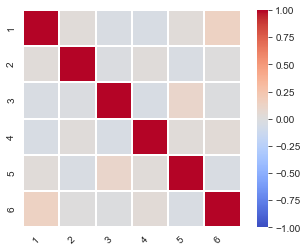

In [9]:
np.random.seed(0)
tau_s = np.random.normal(0, math.sqrt(0.015), size=(6, 441))

tau_s_df = pd.DataFrame(data = tau_s.T, columns=list(range(1, 7)), index=list(range(1,442)))

corr = tau_s_df.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    linewidth=0.3,
    cmap='coolwarm',
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)
plt.savefig('figures/q1_4_s.png')



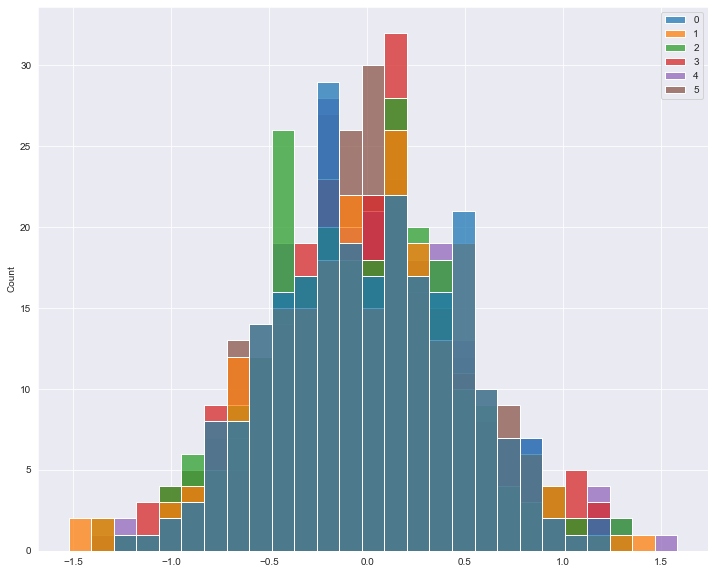

In [10]:
sns.set_style("darkgrid")
fig, ax = plt.subplots(figsize=(12, 10))
sns.histplot(data=tau_t)
plt.savefig('figures/q1_4_hist_t.png')


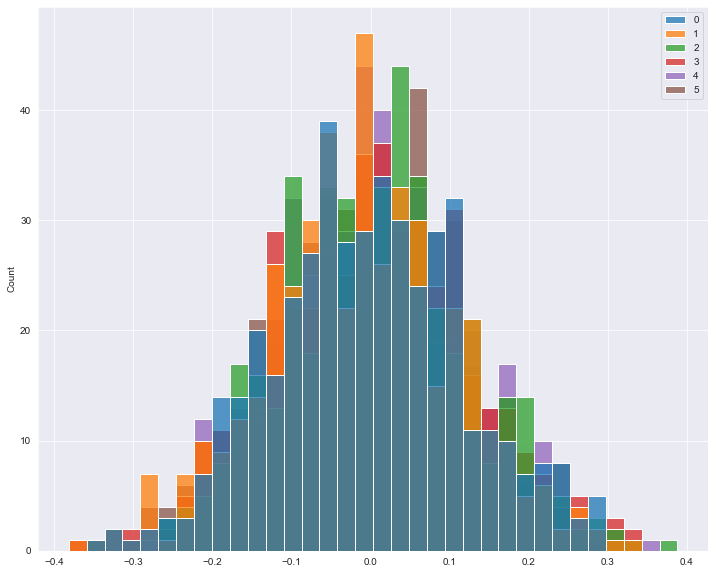

In [11]:
fig, ax = plt.subplots(figsize=(12, 10))
sns.histplot(data=tau_s.T)
plt.savefig('figures/q1_4_hist_s.png')

In [12]:
print(f'Mean of Gamma t is {tau_t.mean()}')
print(f'Mean of Gamma s is {tau_s.mean()}')
print(f'Var of Gamma t is {tau_t.var()}')
print(f'Var of Gamma s is {tau_s.var()}')

Mean of Gamma t is -0.011180394712294822
Mean of Gamma s is -0.002479812546597043
Var of Gamma t is 0.24118099271364205
Var of Gamma s is 0.014268937373149144


In [13]:
def get_percentage_in_range(arr, a, b):
    return np.count_nonzero((arr.flatten() > a) & (arr < b))/arr.size



In [14]:
noises = [tau_s.flatten(), tau_t.flatten()]

for noise in noises:
    sd = noise.std()
    print(get_percentage_in_range(noise, -1.96*sd, 1.96*sd))

0.9512471655328798
0.9472222222222222


In [15]:
def absHighPass(df, absThresh):
    passed = set()
    for (r,c) in combinations(df.columns, 2):
        if (abs(df.loc[r,c]) >= absThresh):
            passed.add(r)
            passed.add(c)
    passed = sorted(passed)
    return (df.loc[passed,passed])

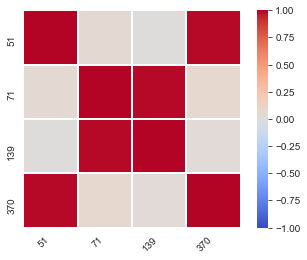

In [24]:
tau_st_df = pd.DataFrame(data = np.dot(tau_t, tau_s), columns=list(range(1, 442)), index=list(range(1,241)))
corr = tau_st_df.corr()


ax = sns.heatmap(
    absHighPass(corr,0.99), 
    vmin=-1, vmax=1, center=0,
    linewidth=0.3,
    cmap='coolwarm',
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)
plt.savefig('figures/q1_4_topten.png')


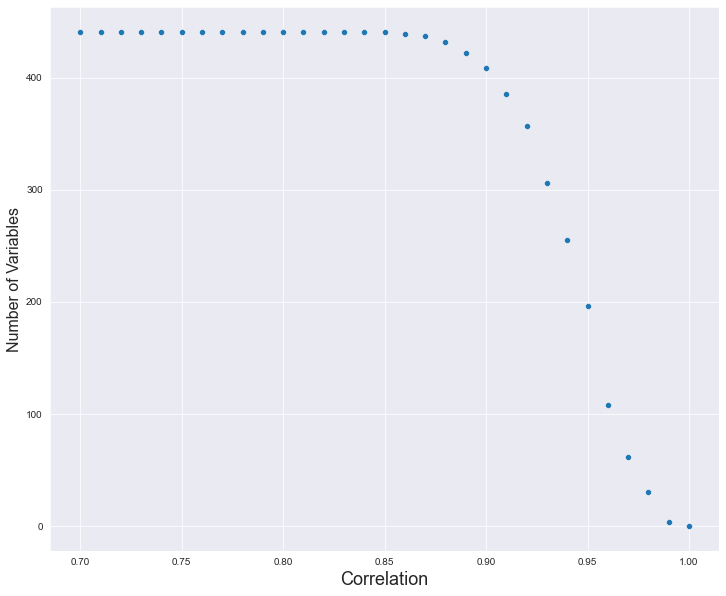

In [17]:

fig, ax = plt.subplots(figsize=(12, 10))
x = np.arange(0.7, 1.0, 0.01)
y = [len(absHighPass(corr,x_val)) for x_val in x]
sns.scatterplot(x= x, y = y)
plt.xlabel('Correlation', fontsize=18)
plt.ylabel('Number of Variables', fontsize=16)
plt.savefig('figures/q1_4_scatter.png')

The shape of the X matrix is (240, 441)
The shape of the sample X matrix is (240, 100)


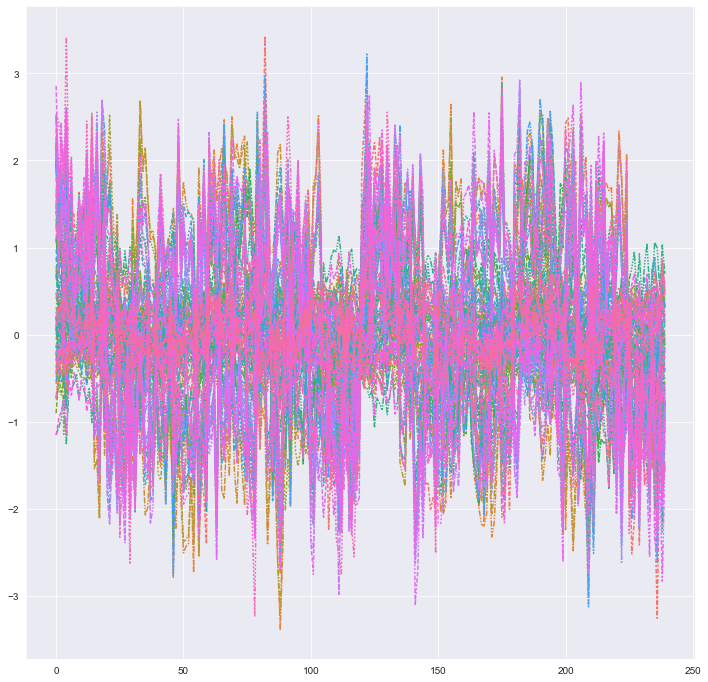

In [18]:
X_matrix = np.matmul(TC + tau_t, SM + tau_s)
print("The shape of the X matrix is", X_matrix.shape)
sample_indicies = np.random.choice(X_matrix.shape[0], size=100, replace=False)
X_sample = X_matrix[:,sample_indicies]
print("The shape of the sample X matrix is", X_sample.shape)
fig, ax = plt.subplots(figsize=(12, 12))
sns.lineplot(ax=ax, data=X_sample, legend=False)
plt.savefig('figures/q1_5_.png')


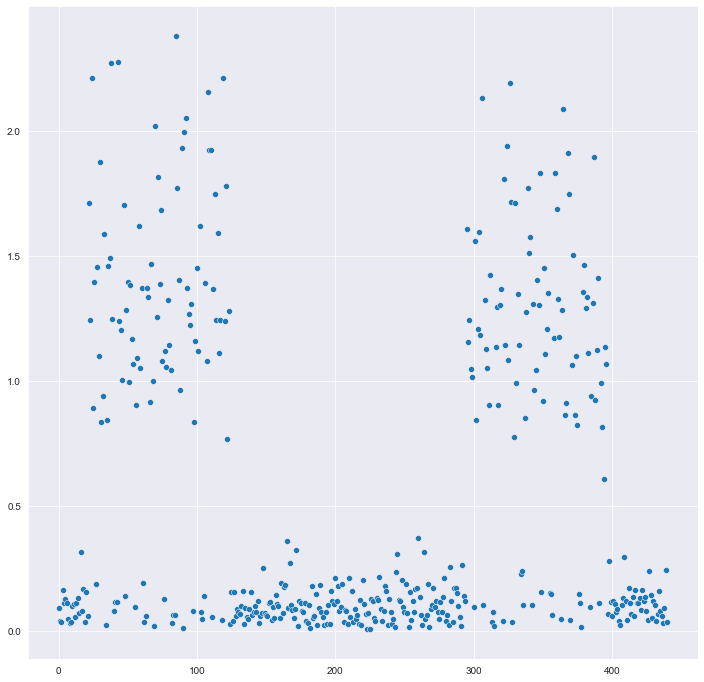

In [19]:
fig, ax = plt.subplots(figsize=(12, 12))
sns.scatterplot(data=X_matrix.var(0))
plt.savefig('figures/q1_5_scatter.png')

In [20]:
## Question 2

X_matrix= StandardScaler().fit_transform(X_matrix)

# Part 1
D = TC
A_lsr = abs((inv((D.T)@D))@(D.T)@X_matrix)
D_lsr = X_matrix@(A_lsr.T)
print(f'A_lsr shape is {A_lsr.shape}')
print(f'D_lsr shape is {D_lsr.shape}')

A_lsr shape is (6, 441)
D_lsr shape is (240, 6)


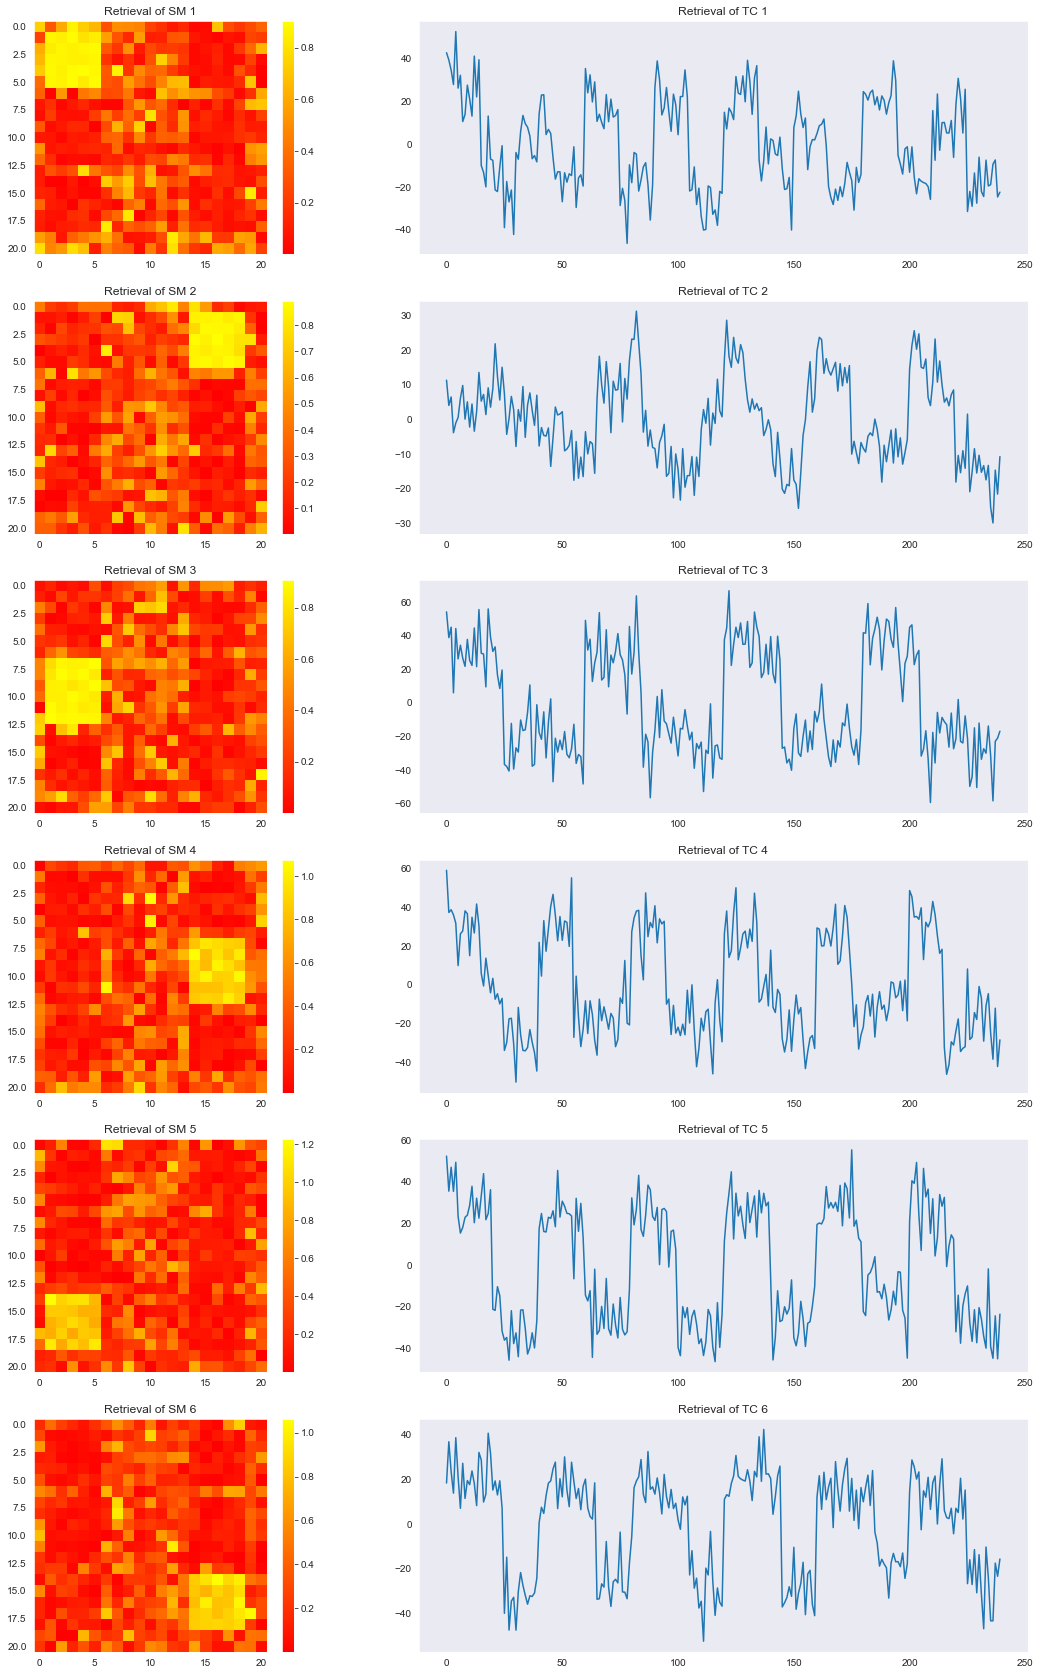

In [25]:
A_lsr_reshaped = np.reshape(A_lsr, (6,21,21), order= ORDER)
sns.set_style("dark")
fig, axs = plt.subplots(6, 2, figsize=(18,30), gridspec_kw={'width_ratios': [1, 2]})
for i in range(NSRCS):

    # SM

    im = axs[i, 0].imshow(A_lsr_reshaped[i],cmap='autumn')
    sm_title = f'Retrieval of SM {i+1}'
    axs[i, 0].title.set_text(sm_title)
    fig.colorbar(im, ax=axs[i, 0])

    # TC

    tc_column = D_lsr.T[i]
    axs[i, 1].plot(tc_column)
    tc_title = f'Retrieval of TC {i+1}'
    axs[i, 1].title.set_text(tc_title)

plt.savefig('figures/q2_1_retrieved.png')

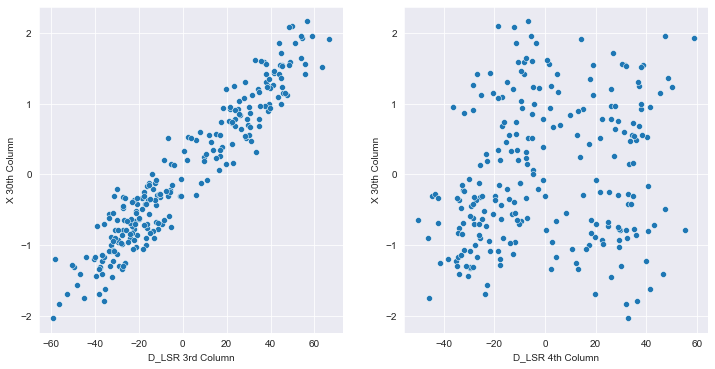

In [26]:
sns.set_style("darkgrid")
D_3 = D_lsr[:,2]
D_4 = D_lsr[:,3]
X_30 = X_matrix[:,29]

fig, ax = plt.subplots(1, 2, figsize=(12, 6))

sns.scatterplot(x=D_3, y=X_30, ax=ax[0])
ax[0].set_xlabel('D_LSR 3rd Column')
ax[0].set_ylabel('X 30th Column')

sns.scatterplot(x=D_4, y=X_30, ax=ax[1])
ax[1].set_xlabel('D_LSR 4th Column')
ax[1].set_ylabel('X 30th Column')

plt.savefig('figures/q2_1_scatter.png')

In [27]:
LAMBDA = 0.2
lambda_tilda = LAMBDA * V

A_rr = abs(inv(D.T@D + np.identity(6) * lambda_tilda)@D.T@X_matrix)
D_rr = X_matrix@A_rr.T
print(f'A_rr shape is {A_lsr.shape}')
print(f'D_rr shape is {D_lsr.shape}')

A_rr shape is (6, 441)
D_rr shape is (240, 6)


In [28]:
c_tlsr = pd.DataFrame(TC).corrwith(pd.DataFrame(D_lsr), axis = 0)
c_trr = pd.DataFrame(TC).corrwith(pd.DataFrame(D_rr), axis = 0)

print(f'sum of c_trr is {sum(c_trr)}')
print(f'sum of c_tlsr is {sum(c_tlsr)}')
print(f'sum(c_trr) > sum(c_tlsr) is therefore {sum(c_trr) > sum(c_tlsr)}')

sum of c_trr is 5.1483809683899135
sum of c_tlsr is 5.138634687777498
sum(c_trr) > sum(c_tlsr) is therefore True


In [29]:
LAMBDA = 1000
lambda_tilda = LAMBDA * V

A_rr_1000 = abs(inv(D.T@D + np.identity(6) * lambda_tilda)@D.T@X_matrix)


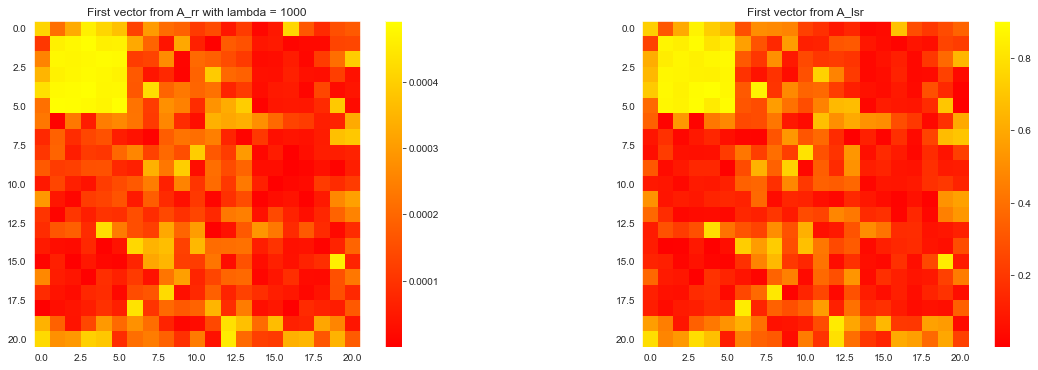

In [30]:
sns.set_style("dark")
A_rr_1000_reshaped = np.reshape(A_rr_1000, (6,21,21), order= ORDER)


fig, axs = plt.subplots(1, 2, figsize=(20,6))
im1 = axs[0].imshow(A_rr_1000_reshaped[0],cmap='autumn')
title1 = (f'First vector from A_rr with lambda = 1000')
axs[0].title.set_text(title1)
fig.colorbar(im1, ax=axs[0])

im2 = axs[1].imshow(A_lsr_reshaped[0],cmap='autumn')
title2 = (f'First vector from A_lsr')
axs[1].title.set_text(title2)
fig.colorbar(im2, ax=axs[1])

plt.savefig('figures/q2_2.png')

In [31]:
def lasso(rho, step, X, TC):
    thr = rho*N*step
    Ao = np.zeros((NSRCS,1))
    A = np.zeros((NSRCS,1))
    Alr = np.zeros((NSRCS,x1 * x2))
    for k in range(x1*x2):
        A = Ao + step * (TC.T@(X[:,k].reshape((240,1)) - (TC@Ao)))
        A = (1/(1+thr)) * (np.sign(A) * np.maximum(np.zeros((NSRCS,1)), abs(A) - thr))

        for i in range(10):
            Ao = A
            A = Ao + step * (TC.T@(X[:,k].reshape((240,1)) - (TC@Ao)))
            A = (1/(1+thr)) * (np.sign(A) * np.maximum(np.zeros((NSRCS,1)), abs(A) - thr))
        
        Alr[:,k] = A.reshape(NSRCS)
    return abs(Alr)



In [32]:
def get_MSE(X, D_lr, A_lr, N, V):
    return (sum(sum(np.square(X - D_lr@A_lr)))/(N*V))

In [33]:
NUM_REALISATIONS = 10
MSE_per_rho = []
step = 1/(np.linalg.norm(D.T@D, ord=1) * 1.1)
rho_lst = np.linspace(0, 1, 21)

for rho in rho_lst:
    MSE_per_X = []
    for i in range (NUM_REALISATIONS):
        
        # get new X Matrix
        np.random.seed(i)
        tau_t = np.random.normal(0, math.sqrt(0.25), size=(240, 6))
        tau_s = np.random.normal(0, math.sqrt(0.015), size=(6, 441))
        X_matrix_new = np.matmul(TC + tau_t, SM + tau_s)
        X_matrix_new = StandardScaler().fit_transform(X_matrix_new)

        ## estimate params
        A_lr = lasso(rho, step, X_matrix_new, D)
        D_lr = X_matrix_new@A_lr.T

        ## get MSE
        MSE_per_X.append(get_MSE(X_matrix_new, D_lr, A_lr, N, V))
    
    MSE_per_rho.append(statistics.mean(MSE_per_X))

print(MSE_per_rho)

[729.8630565565142, 290.426193936324, 150.36840895472727, 84.67293610029137, 48.94295495367241, 28.155906225726287, 15.84626141620144, 8.660280695903133, 4.592904468542634, 2.413638903075091, 1.342417827443479, 0.8932166773547792, 0.7672252697926158, 0.7873779620919569, 0.8557288415854261, 0.9250783023752471, 0.9749811466330464, 0.9971318358576573, 0.999994731740059, 1.0, 1.0]


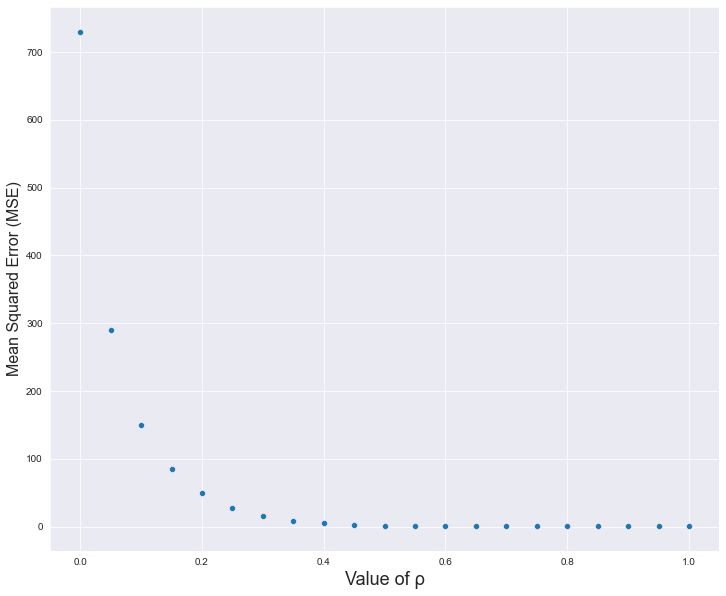

In [34]:
sns.set_style("darkgrid")
fig, ax = plt.subplots(figsize=(12, 10))
sns.scatterplot(x= rho_lst, y = MSE_per_rho)
plt.xlabel('Value of ρ', fontsize=18)
plt.ylabel('Mean Squared Error (MSE)', fontsize=16)
plt.savefig('figures/q2_3.png')


In [35]:
best_rho = rho_lst[np.where(MSE_per_rho == min(MSE_per_rho))]
best_rho

array([0.6])

In [36]:
step = 1/(np.linalg.norm(D.T@D, ord=1) * 1.1)
rho = 0.6
A_lr = lasso(rho, step, X_matrix, D)
D_lr = X_matrix@(A_lr.T)

In [37]:
def get_c_vector(x, y):
    c = []
    for i in range(len(x)):
        c.append(np.corrcoef(x[i],y[i])[1][0])
    return c

In [39]:
c_trr = get_c_vector(TC.T, D_rr.T)
c_srr = get_c_vector(SM, A_rr)
c_tlr = get_c_vector(TC.T, D_lr.T)
c_slr = get_c_vector(SM, A_lr)

print(f'sum of c_trr: {sum(c_trr)}')
print(f'sum of c_srr: {sum(c_srr)}')
print(f'sum of c_tlr: {sum(c_tlr)}')
print(f'sum of c_slr: {sum(c_slr)}')

sum of c_trr: 5.148380968389913
sum of c_srr: 3.576876695488989
sum of c_tlr: 5.3949472349484155
sum of c_slr: 5.0322759820011145


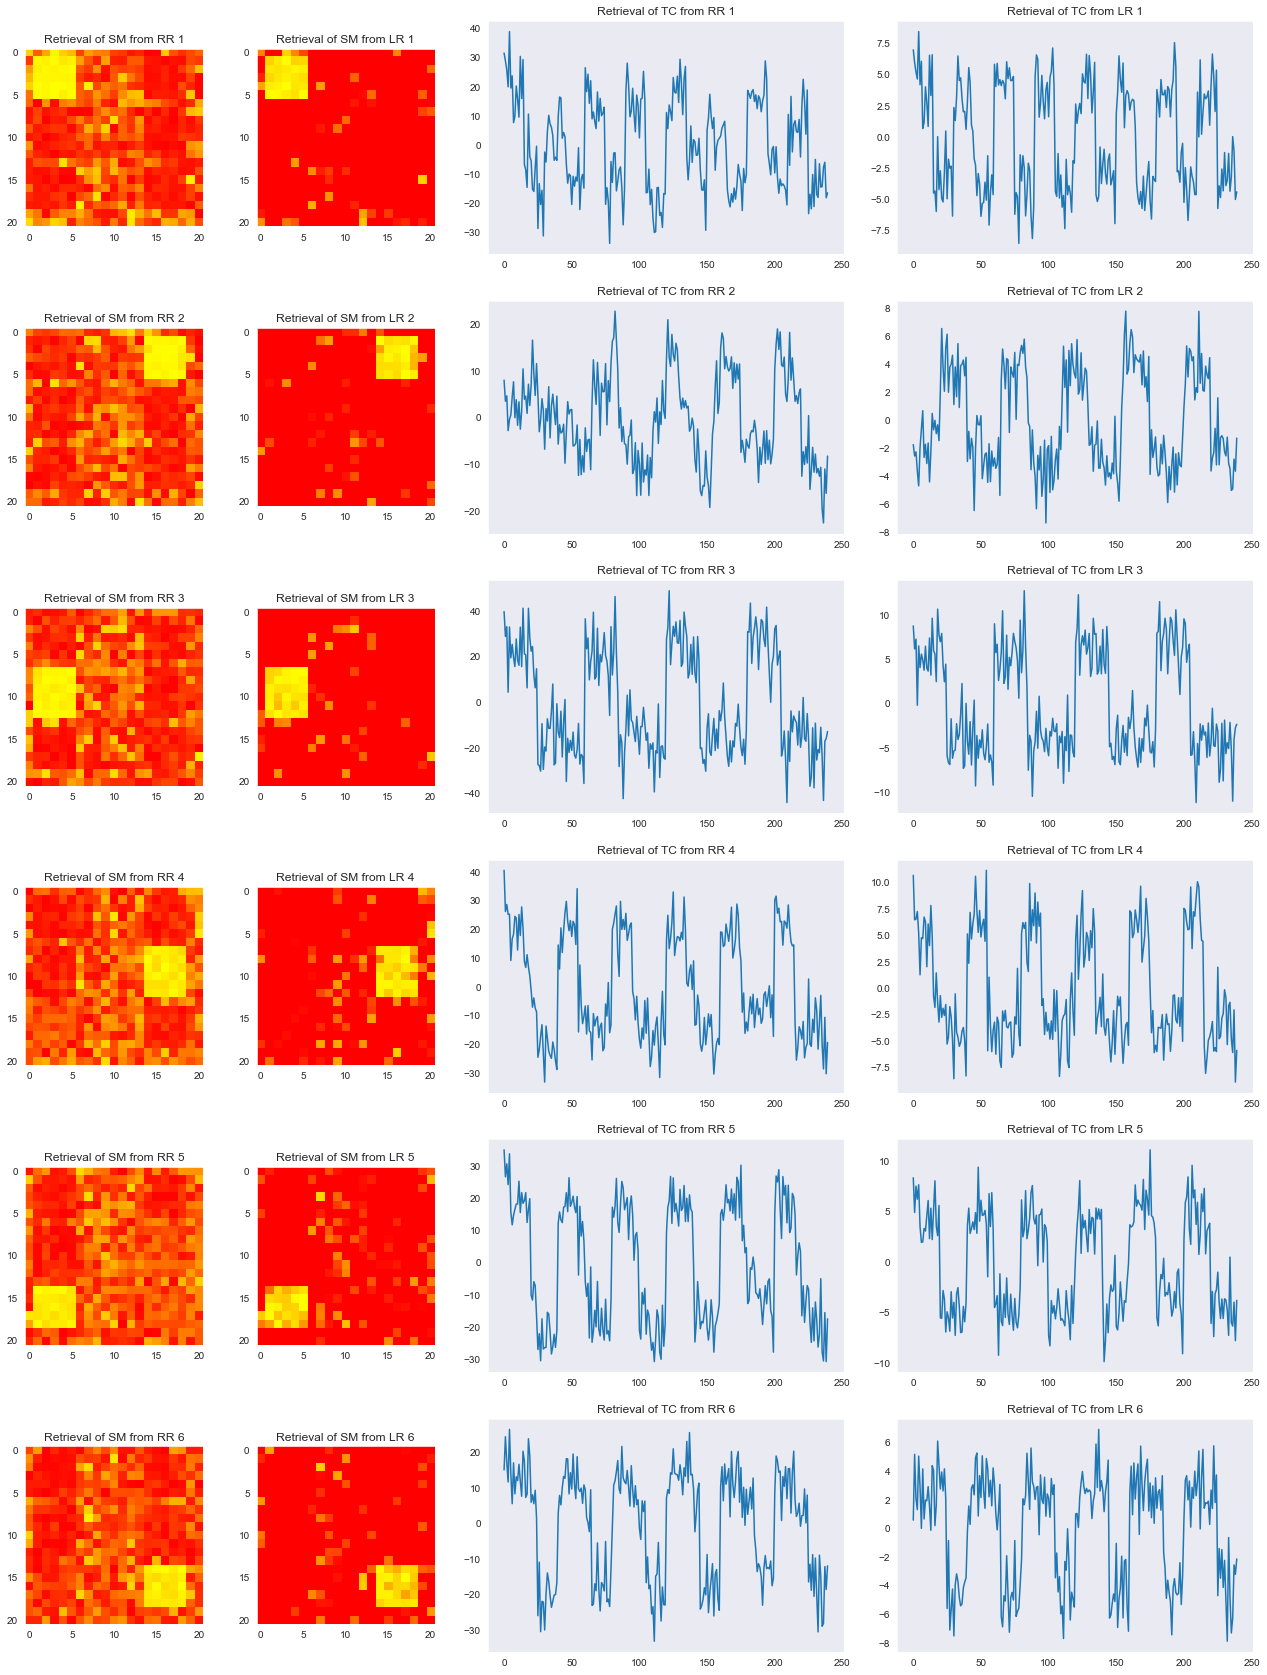

In [40]:
A_rr_reshaped = np.reshape(A_rr, (6,21,21), order= ORDER)
A_lr_reshaped = np.reshape(A_lr, (6,21,21), order= ORDER)
sns.set_style("dark")
fig, axs = plt.subplots(6, 4, figsize=(22,30), gridspec_kw={'width_ratios': [1,1,2,2]})
for i in range(NSRCS):

    # SM RR

    im = axs[i, 0].imshow(A_rr_reshaped[i],cmap='autumn')
    sm_title1 = f'Retrieval of SM from RR {i+1}'
    axs[i, 0].title.set_text(sm_title1)

    # SM LR

    im = axs[i, 1].imshow(A_lr_reshaped[i],cmap='autumn')
    sm_title2 = f'Retrieval of SM from LR {i+1}'
    axs[i, 1].title.set_text(sm_title2)
  
    

    # TC RR

    tc_column = D_rr.T[i]
    axs[i, 2].plot(tc_column)
    tc_title1 = f'Retrieval of TC from RR {i+1}'
    axs[i, 2].title.set_text(tc_title1)

    # TC LR

    tc_column = D_lr.T[i]
    axs[i, 3].plot(tc_column)
    tc_title2 = f'Retrieval of TC from LR {i+1}'
    axs[i, 3].title.set_text(tc_title2)
plt.savefig('figures/q2_4.png')

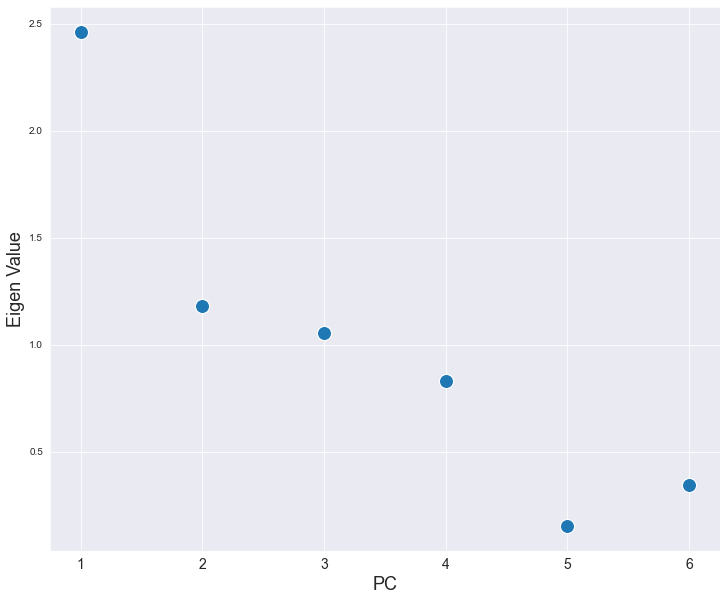

In [41]:
sns.set_style("darkgrid")
fig, ax = plt.subplots(figsize=(12, 10))
covariance_matrix = np.cov(TC.T)
eigen_values, eigen_vectors = np.linalg.eig(covariance_matrix)
Z = TC@eigen_vectors
eigen_plt = sns.scatterplot(data = eigen_values, s=200)
plt.ylabel('Eigen Value', fontsize=18)
plt.xlabel('PC', fontsize=18)
eigen_plt.set_xticks(range(6))
eigen_plt.set_xticklabels(range(1,7), fontsize = 14)
plt.savefig('figures/q2_5_eigen.png')

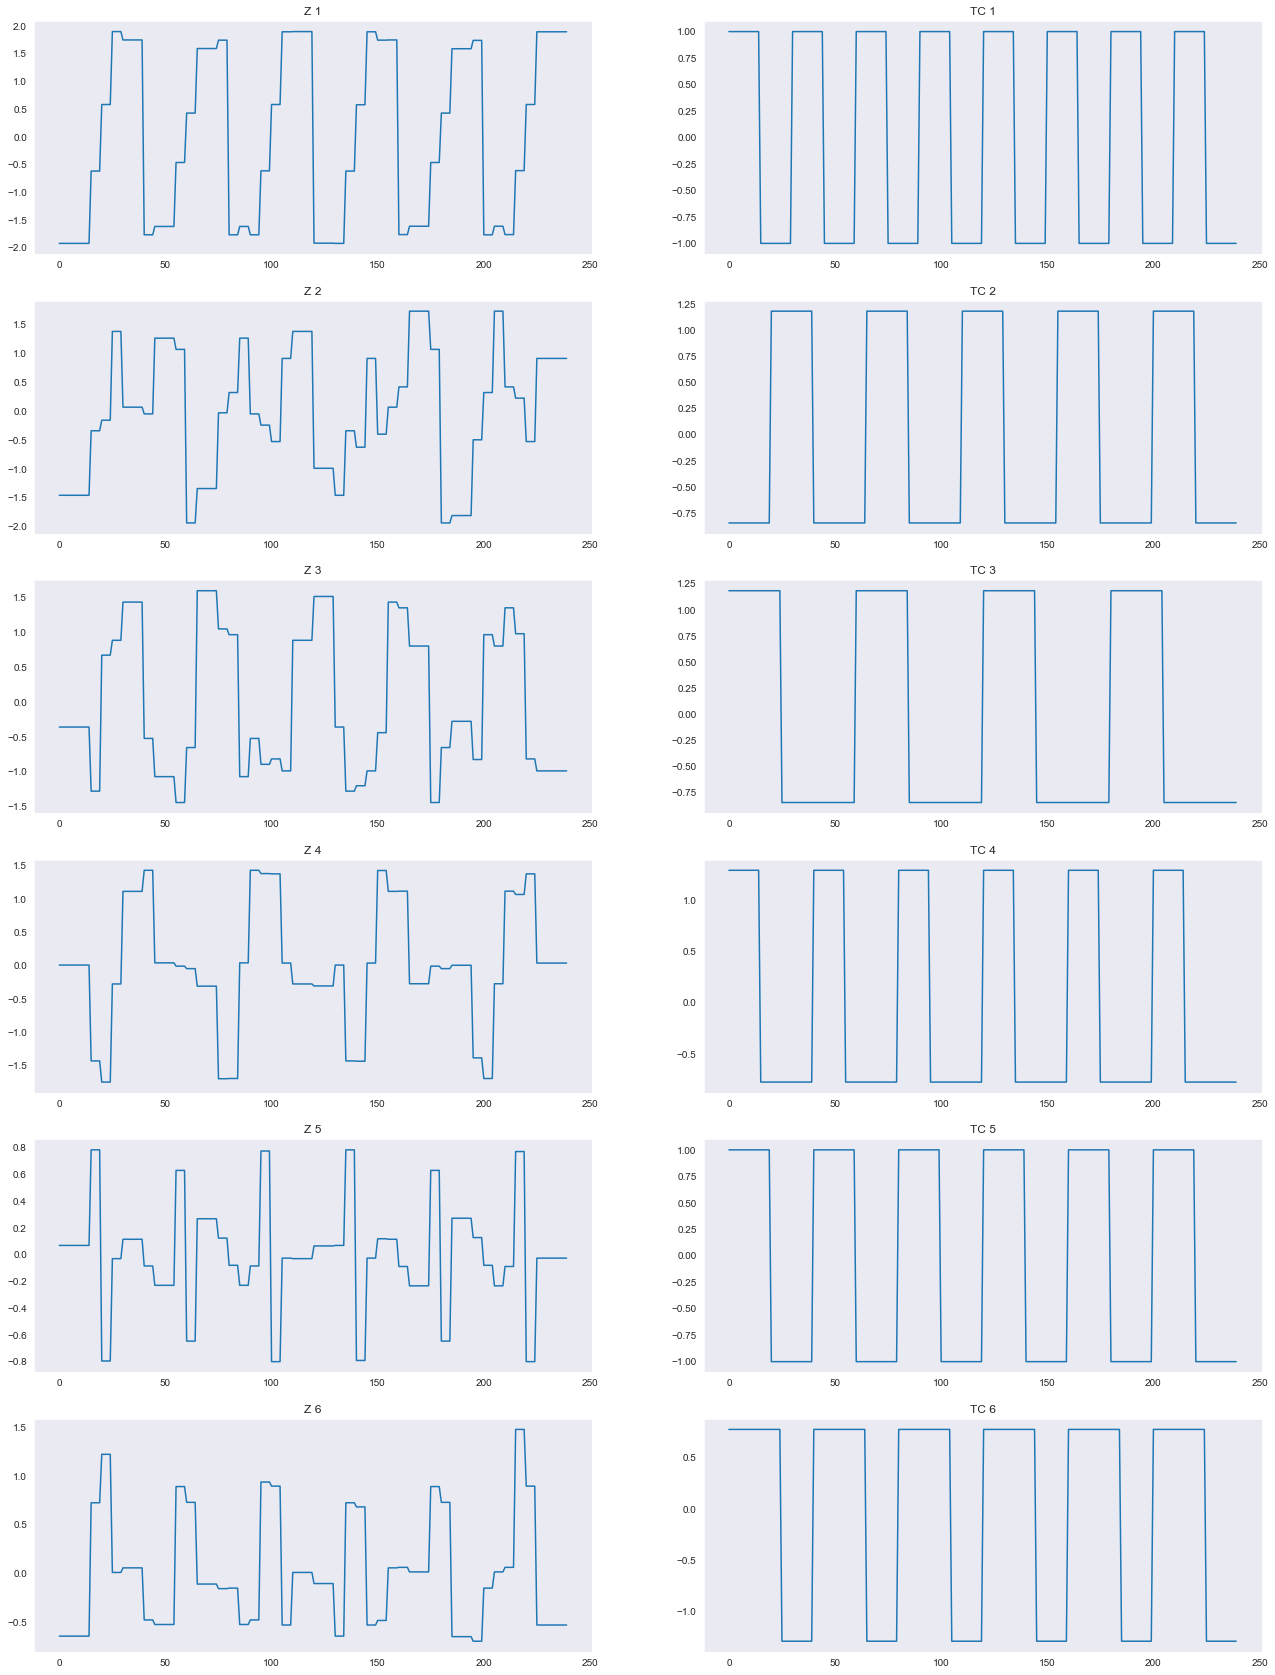

In [42]:
sns.set_style("dark")
fig, axs = plt.subplots(6, 2, figsize=(22,30))
for i in range(NSRCS):

    # Z
    z_column = Z.T[i]
    axs[i, 0].plot(z_column)
    z_title = f'Z {i+1}'
    axs[i, 0].title.set_text(z_title)

    # SM

    tc_column = TC.T[i]
    axs[i, 1].plot(tc_column)
    tc_title = f'TC {i+1}'
    axs[i, 1].title.set_text(tc_title)

plt.savefig('figures/q2_5_Z.png')

In [43]:
step = 1/(np.linalg.norm(Z.T@Z, ord=1) * 1.1)
rho = 0.001
A_lr_pc = lasso(rho, step, X_matrix, Z)
D_lr_pc = X_matrix@(A_lr_pc.T)


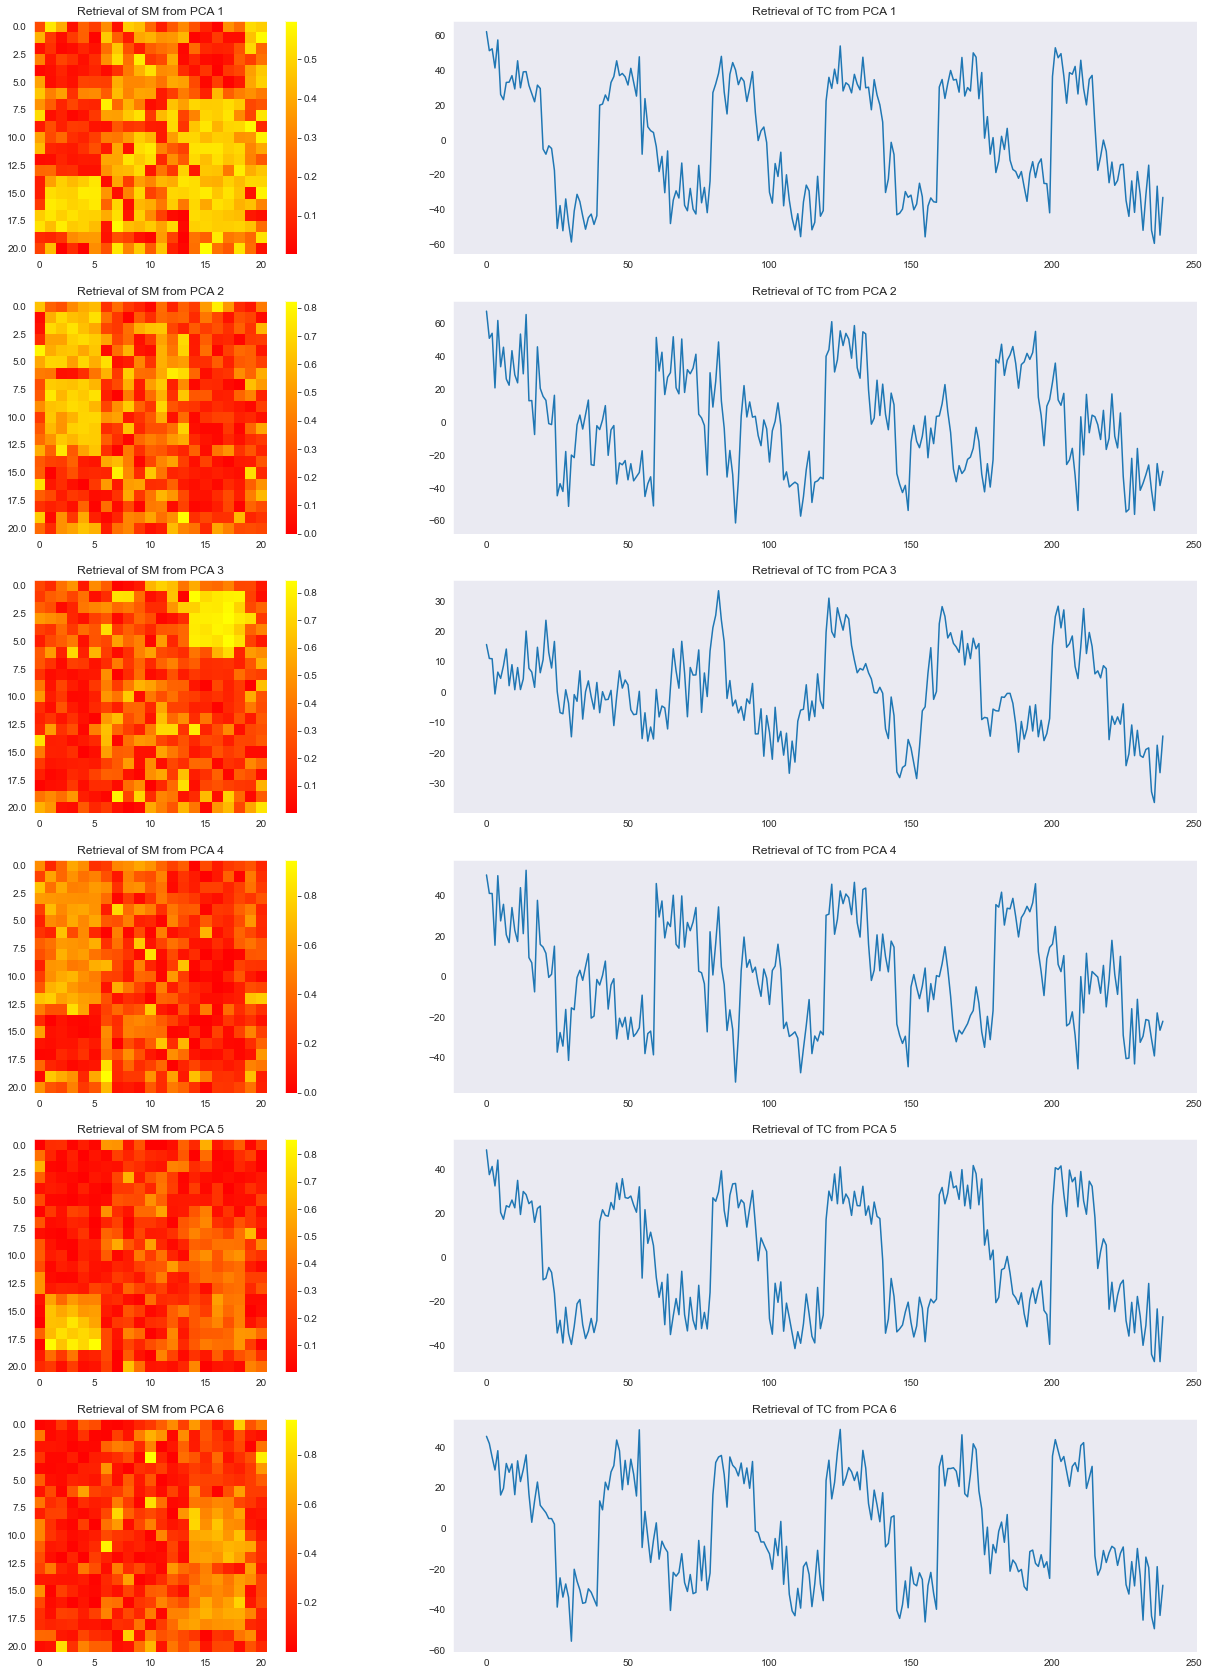

In [44]:
A_lsr_pc_reshaped = np.reshape(A_lr_pc, (6,21,21), order = ORDER)
sns.set_style("dark")
fig, axs = plt.subplots(6, 2, figsize=(22,30), gridspec_kw={'width_ratios': [1, 2]})
for i in range(NSRCS):

    # SM

    im = axs[i, 0].imshow(A_lsr_pc_reshaped[i],cmap='autumn')
    sm_title = f'Retrieval of SM from PCA {i+1}'
    axs[i, 0].title.set_text(sm_title)
    fig.colorbar(im, ax=axs[i, 0])
    

    # TC

    tc_column = D_lr_pc.T[i]
    axs[i, 1].plot(tc_column)
    tc_title = f'Retrieval of TC from PCA {i+1}'
    axs[i, 1].title.set_text(tc_title)

plt.savefig('figures/q2_5_retrieval.png')